# 以 Matplotlib 探索資料

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

## 關於 Matplotlib

## 什麼是 Matplotlib？

> Matplotlib，Matlab Plotting Library 的簡稱，是在 Python 中將資料視覺化的第三方套件。

來源：<https://matplotlib.org/>

## 以 `import` 指令載入 Matplotlib

Matplotlib 的官方縮寫是 `mpl`。

In [2]:
import matplotlib as mpl

## 如果環境中沒有安裝 Matplotlib，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'matplotlib'
```

## 如果遭遇 `ModuleNotFoundError` 可以在終端機使用 `pip install` 指令安裝

```bash
pip install matplotlib
```

## 可以透過兩個屬性檢查版本號與安裝路徑

- `__version__` 屬性檢查版本號。
- `__file__` 屬性檢查安裝路徑。

In [3]:
print(mpl.__version__)
print(mpl.__file__)

3.3.4
/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/matplotlib/__init__.py


## 我們主要使用 Matplotlib 中 `pyplot` 模組（套件）的功能

`matplotlib.pyplot` 官方縮寫為 `plt`。

In [4]:
import matplotlib.pyplot as plt

## 為什麼資料需要視覺化？

視覺化在探索性資料分析中佔有舉足輕重的地位，因為對人類來說暸解原始數列資料或者函數是極其困難的。

## 抽象的原始數列資料

In [5]:
arr = np.random.normal(size=10000)
arr

array([-1.21877608, -1.12506402, -1.54127908, ..., -0.01695767,
        1.06554696,  0.95829274])

## 抽象的函數

\begin{equation}
f(p) = -log(p) \\
f(p) = -log(1-p)
\end{equation}

## 抽象的函數（續）

\begin{equation}
f(x) = \frac{1}{1 + e^{-x}}
\end{equation}

## 將原始數列資料視覺化

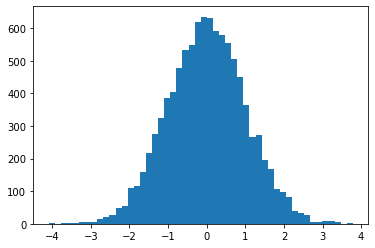

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.hist(arr, bins=50)
plt.show()

## 將函數視覺化

In [7]:
eps = 1e-06 # epsilon, a tiny number to avoid infinity
p = np.linspace(0 + eps, 1 - eps, 10000)
log_loss_0 = -np.log(1-p)
log_loss_1 = -np.log(p)

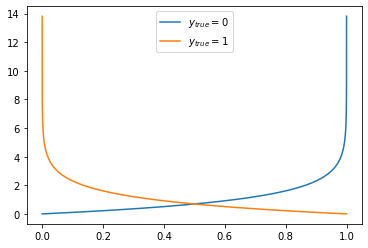

In [8]:
fig = plt.figure()
ax = plt.axes()
ax.plot(p, log_loss_0, label='$y_{true}=0$')
ax.plot(p, log_loss_1, label='$y_{true}=1$')
ax.legend()
plt.show()

## 將函數視覺化（續）

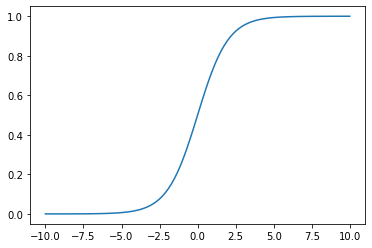

In [9]:
x = np.linspace(-10, 10, 100)
fx = 1 / (1 + np.exp(-x))
fig = plt.figure()
ax = plt.axes()
ax.plot(x, fx)
plt.show()

## 經典視覺化

- [Charles Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard.png).
- [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo).

## 好的視覺化要素

- 有資訊價值。
- 簡潔。
- 美觀。

## Matplotlib 的兩種語法

## 新手學習 Matplotlib 的最大挑戰：兩種不同的作圖語法

1. Matlab 風格。
2. 物件導向風格。

## Matlab 風格：狀態型介面

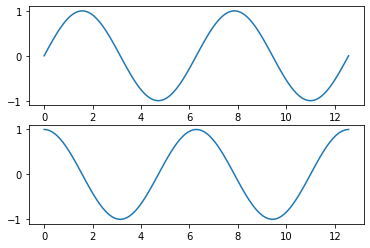

In [10]:
x = np.linspace(0, np.pi*4, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.show()

## 物件導向風格：物件方法介面

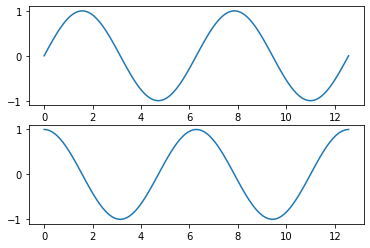

In [11]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
plt.show()

## 我們會採用物件導向風格

## 標準流程

## 視覺化的五步驟

1. 建立數值陣列。
2. 分別（或同時）建立「畫布物件」與「軸物件」。
3. 使用（呼叫）「軸物件」的作圖方法建立主要圖形。
4. 使用（呼叫）「軸物件」的作圖方法添加圖形元素。
5. 顯示或者儲存圖形。

## 建立數值陣列

In [12]:
x = np.linspace(0, np.pi*4, 100)
y = np.sin(x)

## 分別建立「畫布物件」與「軸物件」

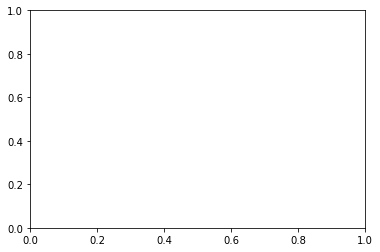

In [13]:
fig = plt.figure()
ax = plt.axes()

## 同時建立「畫布物件」與「軸物件」

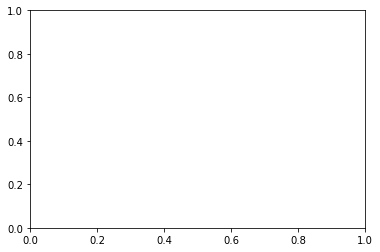

In [14]:
fig, ax = plt.subplots()

## 使用（呼叫）「軸物件」的作圖方法建立主要圖形

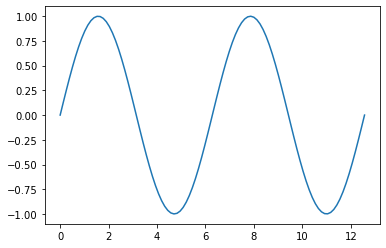

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)

## 使用（呼叫）「軸物件」的作圖方法添加圖形元素

Text(0.5, 0, 'x')

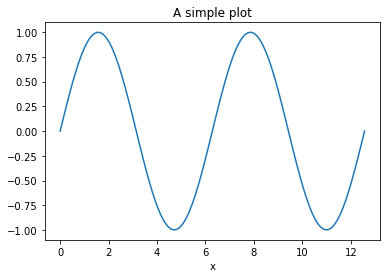

In [16]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x, y)
axes.set_title('A simple plot')
axes.set_xlabel('x')

## 顯示圖形

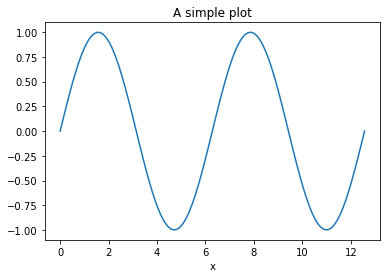

In [17]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x, y)
axes.set_title('A simple plot')
axes.set_xlabel('x')
plt.show()

## 儲存圖形：可支援的圖片格式

In [18]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

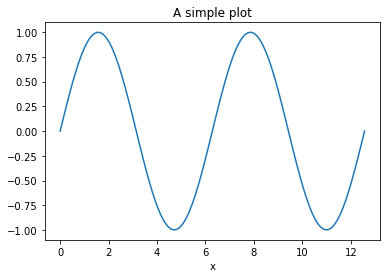

In [19]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x, y)
axes.set_title('A simple plot')
axes.set_xlabel('x')
fig.savefig('a_simple_plot.png')

## 軸物件不同的方法對應不同的主要圖形

- `scatter` 觀察相關的散佈圖。
- `hist` 觀察分配的直方圖。
- `plot` 觀察趨勢的線圖。
- `bar` 觀察排序的長條圖。
- `imshow` 顯示圖片。
- ...等。

## 觀察相關的散佈圖

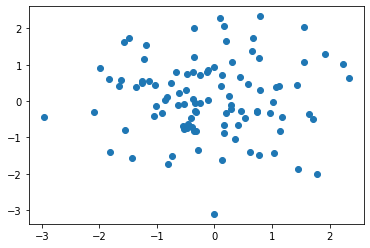

In [20]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)
fig = plt.figure()
axes = plt.axes()
axes.scatter(x, y)
plt.show()

## 觀察分配的直方圖

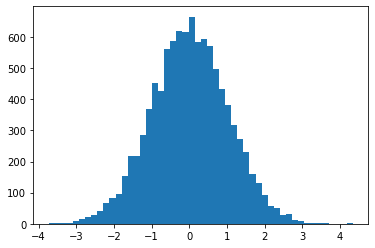

In [21]:
x = np.random.normal(size=10000)
fig = plt.figure()
axes = plt.axes()
axes.hist(x, bins=50)
plt.show()

## 觀察趨勢的線圖

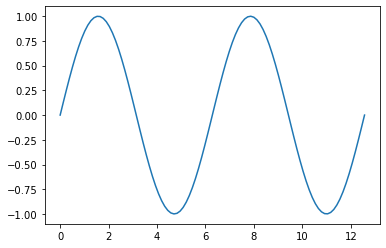

In [22]:
x = np.linspace(0, np.pi*4, 100)
y = np.sin(x)
fig = plt.figure()
axes = plt.axes()
axes.plot(x, y)
plt.show()

## 觀察排序的長條圖

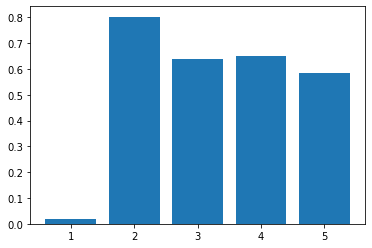

In [23]:
x = np.arange(1, 6)
y = np.random.random(size=5)
fig = plt.figure()
axes = plt.axes()
axes.bar(x, y)
plt.show()

## 顯示圖片

![Imgur](https://i.imgur.com/hTFmWKO.jpg?1)

In [24]:
!curl -o a_very_cute_schnauzer.jpg "https://i.imgur.com/hTFmWKO.jpg?1"
pic = Image.open('a_very_cute_schnauzer.jpg')
arr = np.array(pic)
print(arr.shape)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24876  100 24876    0     0  38808      0 --:--:-- --:--:-- --:--:-- 38868
(459, 344, 3)


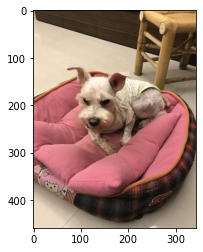

In [25]:
fig = plt.figure()
axes = plt.axes()
axes.imshow(arr)
plt.show()

## 添加元素的技巧

## 將 CSV 文字檔案讀入成為資料框

- 範例：COVID-19 時間序列資料。
- 來源：<https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series>

In [26]:
request_url = "https://raw.githubusercontent.com/CSSEGISandData\
/COVID-19/master/csse_covid_19_data/\
csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
time_series = pd.read_csv(request_url)
id_cols = time_series.columns[:4]
time_series_long = pd.melt(time_series, id_vars=id_cols, var_name='Date', value_name='Confirmed')
date = pd.to_datetime(time_series_long['Date'])
time_series_long = time_series_long.drop(['Province/State', 'Lat', 'Long', 'Date'], axis=1)
time_series_long.insert(1, 'Date', date)
groupby_ser = time_series_long.groupby(['Country/Region', 'Date'])['Confirmed'].sum()
ts = pd.DataFrame(groupby_ser).reset_index()

In [27]:
ts

,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0
...,...,...,...
105100,Zimbabwe,2021-07-09,65066
105101,Zimbabwe,2021-07-10,66853
105102,Zimbabwe,2021-07-11,67765
105103,Zimbabwe,2021-07-12,70426


## 如何添加標題與軸標籤

- 使用（呼叫）軸物件的 `set_title` 方法添加標題。
- 使用（呼叫）軸物件的 `set_xlabel` 方法添加 x 軸標籤。
- 使用（呼叫）軸物件的 `set_ylabel` 方法添加 y 軸標籤。

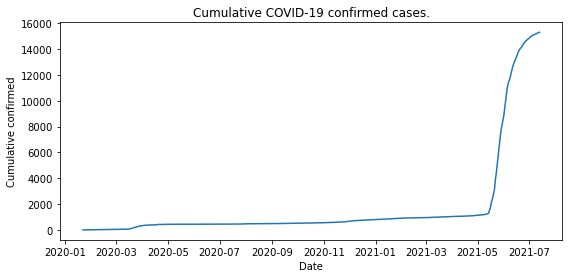

In [28]:
tw = ts[ts['Country/Region'] == 'Taiwan*']
x = tw['Date'].values
y = tw['Confirmed'].values
fig = plt.figure(figsize=(9, 4))
axes = plt.axes()
axes.plot(x, y)
axes.set_title('Cumulative COVID-19 confirmed cases.')
axes.set_xlabel('Date')
axes.set_ylabel('Cumulative confirmed')
plt.show()

## 如何調整軸刻度

- 使用（呼叫）軸物件的 `set_xticks` 方法調整 x 軸刻度。
- 使用（呼叫）軸物件的 `set_yticks` 方法調整 y 軸刻度。

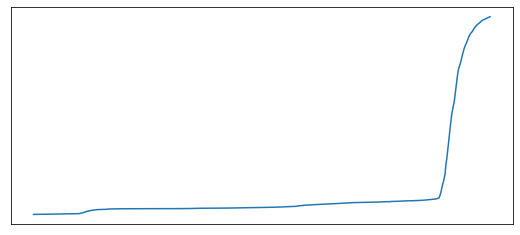

In [29]:
fig = plt.figure(figsize=(9, 4))
axes = plt.axes()
axes.plot(x, y)
axes.set_xticks([])
axes.set_yticks([])
plt.show()

## 如何調整軸刻度標籤

- 使用（呼叫）軸物件的 `set_xticklabels` 方法調整 x 軸刻度標籤。
- 使用（呼叫）軸物件的 `set_yticklabels` 方法調整 y 軸刻度標籤。

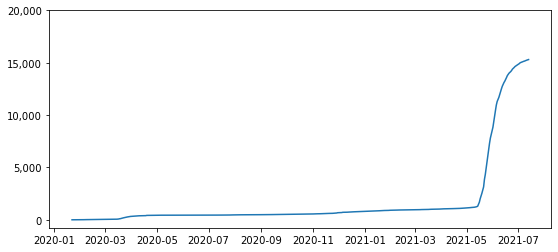

In [30]:
fig = plt.figure(figsize=(9, 4))
axes = plt.axes()
axes.plot(x, y)
axes.set_yticks([0, 5000, 10000, 15000, 20000])
axes.set_yticklabels(['0', '5,000', '10,000', '15,000', '20,000'])
plt.show()

## 如何調整軸的上下限

- 使用（呼叫）軸物件的 `set_xlim` 方法調整 x 軸的上下限。
- 使用（呼叫）軸物件的 `set_ylim` 方法調整 y 軸的上下限。

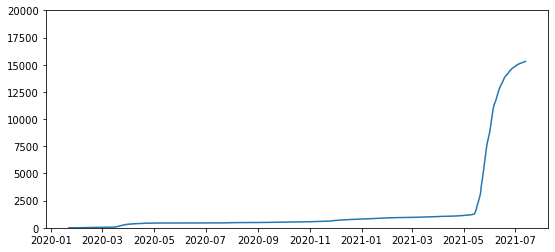

In [31]:
fig = plt.figure(figsize=(9, 4))
axes = plt.axes()
axes.plot(x, y)
axes.set_ylim([0, 20000])
plt.show()

## 如何添加文字

使用（呼叫）軸物件的 `text(x, y, 'Some Strings')` 方法在 `(x, y)` 的位置添加 `'Some Strings'`。

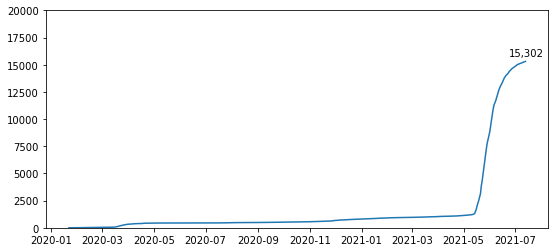

In [32]:
fig = plt.figure(figsize=(9, 4))
axes = plt.axes()
axes.plot(x, y)
last_data_x, last_data_y = x[-20], y[-1]
axes.set_ylim([0, 20000])
axes.text(last_data_x, last_data_y + 500, "{:,}".format(last_data_y))
plt.show()

## 如何添加圖例

使用（呼叫）軸物件的 `legend()` 方法與 `label` 參數。

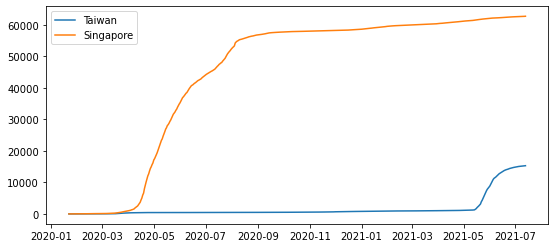

In [33]:
sg = ts[ts['Country/Region'] == 'Singapore']
y_sg = sg['Confirmed'].values
fig = plt.figure(figsize=(9, 4))
axes = plt.axes()
axes.plot(x, y, label='Taiwan')
axes.plot(x, y_sg, label='Singapore')
axes.legend()
plt.show()

## 如何在一個畫布上建立子圖

- 使用（呼叫）`subplots(m, n)` 方法建立一個外型為 `(m, n)` 的 `ndarray`。
- 在這個 `ndarray` 中有 `(m, n)` 個軸物件可供取用。
- 以 `[m, n]` 語法取得位於 `(m, n)` 的軸物件.

<class 'numpy.ndarray'>
(3, 2)


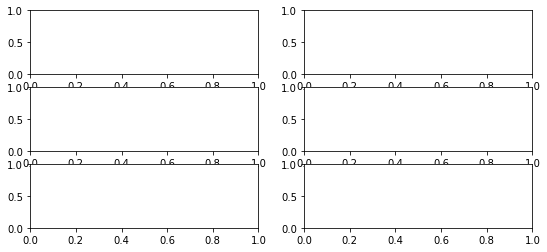

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(9, 4))
print(type(axes))
print(axes.shape)

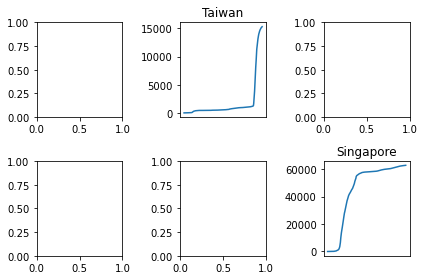

In [35]:
fig, axes = plt.subplots(2, 3)
axes[0, 1].plot(x, y)
axes[0, 1].set_xticks([])
axes[0, 1].set_title('Taiwan')
axes[1, 2].plot(x, y_sg)
axes[1, 2].set_xticks([])
axes[1, 2].set_title('Singapore')
plt.tight_layout()
plt.show()

## 如何調整中文字型無法顯示的問題

Matplotlib 預設使用的字體不支援中文、日文、韓文等非歐美語系文字。

## 指定可以支援中文字體的字型

使用 `FontProperties` 函數。

In [36]:
from matplotlib.font_manager import FontProperties

my_font = FontProperties(fname="/System/Library/Fonts/STHeiti Light.ttc") # Fonts supported traditional Chinese in macOS

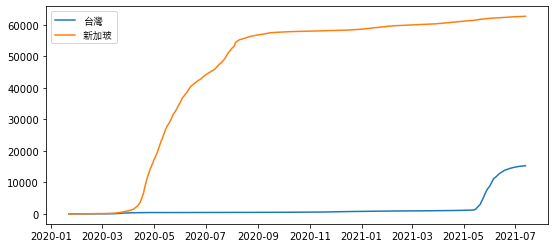

In [37]:
sg = ts[ts['Country/Region'] == 'Singapore']
y_sg = sg['Confirmed'].values
fig = plt.figure(figsize=(9, 4))
axes = plt.axes()
axes.plot(x, y, label='台灣')
axes.plot(x, y_sg, label='新加玻')
ax.set_title('COVID-19 累計確診人數', fontproperties=my_font)
ax.set_xlabel('日期', fontproperties=my_font)
axes.legend(prop=my_font)
plt.show()